# Consumption Data

Information about the columns:

| Field | Description | Notes | 
| --- | --- | --- | 
| DateTime  | The date the Consumption was forecasted (Fridays, frequency every week or every second week) | format: yyyy-mm-dd  | 
| ForecastedDate | The date the consumption is forecasted for | format: yyyy-mm-dd   | 
| Consumption  | The consumption for each region (SE/CW, S, N, NE and the sum of all)  | Unit: MWh (Mega Watt/ hour) |


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import get_prepared_data as gpd

In [2]:
df_consumption = gpd.get_consumption_data_cleaned()
df_consumption.head()

,DateTime,ForecastedDate,Consumption(MWh)_N,Consumption(MWh)_NE,Consumption(MWh)_S,Consumption(MWh)_SE/CW,Total Consumption(MWh)
0,2006-02-23,2006-03-04,537583.2,1171447.2,1393375.2,4850563.2,7952968.8
1,2006-02-23,2006-03-11,552216.0,1198209.6,1440163.2,5162169.6,8352758.4
2,2006-02-23,2006-03-18,561422.4,1198898.4,1417231.2,5193199.2,8370751.2
3,2006-02-23,2006-03-25,561825.6,1197016.8,1414425.6,5110996.8,8284264.8
4,2006-02-23,2006-04-01,562161.6,1193304.0,1414408.8,5110929.6,8280804.0


In [3]:
#The range of the DateTime and DeliveryStartDate columns
print(f"DateTime range: {df_consumption['DateTime'].min()} to {df_consumption['DateTime'].max()}")
print(f"ForecastedDate range: {df_consumption['ForecastedDate'].min()} to {df_consumption['ForecastedDate'].max()}")


DateTime range: 2006-02-23 00:00:00 to 2024-10-17 00:00:00
ForecastedDate range: 2006-03-04 00:00:00 to 2024-10-26 00:00:00


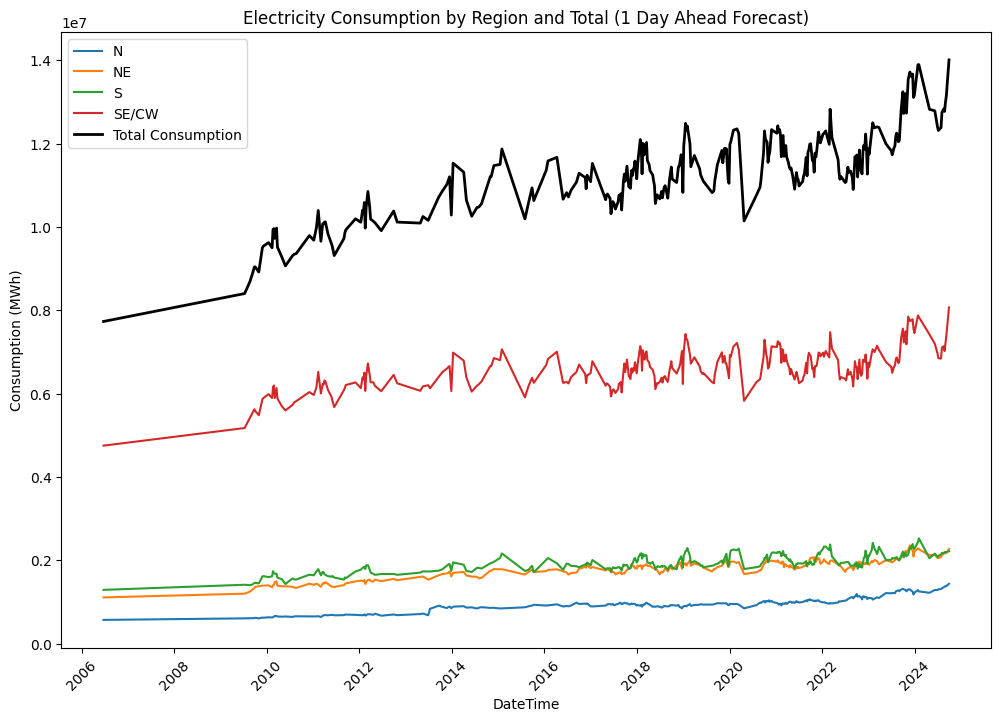

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'DateTime' and 'ForecastedDate' are in datetime format
df_consumption['DateTime'] = pd.to_datetime(df_consumption['DateTime'])
df_consumption['ForecastedDate'] = pd.to_datetime(df_consumption['ForecastedDate'])

# Step 1: Calculate the difference between 'ForecastedDate' and 'DateTime'
df_consumption['DateDiff'] = (df_consumption['ForecastedDate'] - df_consumption['DateTime']).dt.days

# Step 2: Filter for rows where the difference is +1 (ForecastedDate is the next day)
df_closest_forecast = df_consumption[df_consumption['DateDiff'] == 1]

# Step 3: Plot the total consumption and regions using the closest forecasted date
plt.figure(figsize=(12,8))

# Plotting each region
plt.plot(df_closest_forecast['DateTime'], df_closest_forecast['Consumption(MWh)_N'], label='N')
plt.plot(df_closest_forecast['DateTime'], df_closest_forecast['Consumption(MWh)_NE'], label='NE')
plt.plot(df_closest_forecast['DateTime'], df_closest_forecast['Consumption(MWh)_S'], label='S')
plt.plot(df_closest_forecast['DateTime'], df_closest_forecast['Consumption(MWh)_SE/CW'], label='SE/CW')

# Plotting total consumption
plt.plot(df_closest_forecast['DateTime'], df_closest_forecast['Total Consumption(MWh)'], label='Total Consumption', linewidth=2, color='black')

# Customize the plot
plt.title('Electricity Consumption by Region and Total (1 Day Ahead Forecast)')
plt.xlabel('DateTime')
plt.ylabel('Consumption (MWh)')
plt.xticks(rotation=45)
plt.legend()

# Display the plot
plt.show()


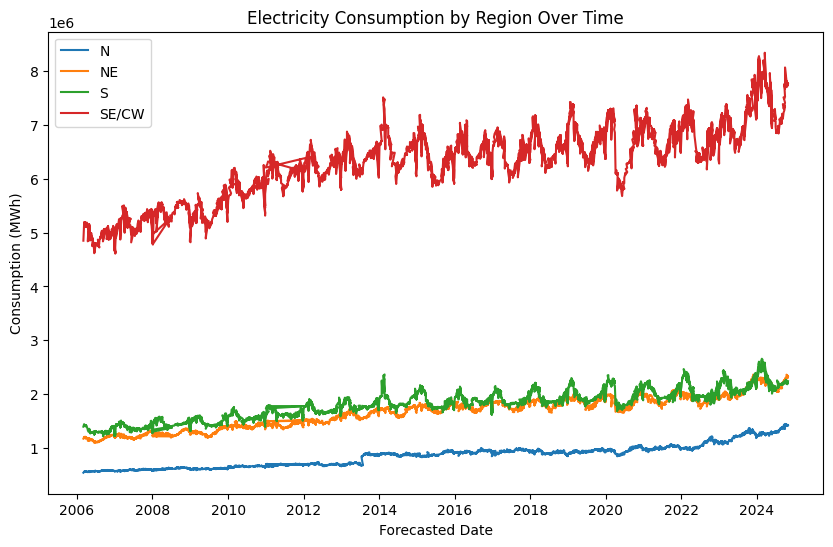

In [5]:
# Plotting consumption for each region
plt.figure(figsize=(10,6))
plt.plot(df_consumption['ForecastedDate'], df_consumption['Consumption(MWh)_N'], label='N')
plt.plot(df_consumption['ForecastedDate'], df_consumption['Consumption(MWh)_NE'], label='NE')
plt.plot(df_consumption['ForecastedDate'], df_consumption['Consumption(MWh)_S'], label='S')
plt.plot(df_consumption['ForecastedDate'], df_consumption['Consumption(MWh)_SE/CW'], label='SE/CW')
plt.title('Electricity Consumption by Region Over Time')
plt.xlabel('Forecasted Date')
plt.ylabel('Consumption (MWh)')
plt.legend()
plt.show()


In [6]:
from scipy.stats import skew
# Calculate skewness for each region and the total consumption
skew_n = skew(df_consumption['Consumption(MWh)_N'])
skew_ne = skew(df_consumption['Consumption(MWh)_NE'])
skew_s = skew(df_consumption['Consumption(MWh)_S'])
skew_secw = skew(df_consumption['Consumption(MWh)_SE/CW'])
skew_total = skew(df_consumption['Total Consumption(MWh)'])

# Create a DataFrame to display the skewness values
skewness_df = pd.DataFrame({
    'Region': ['N', 'NE', 'S', 'SE/CW', 'Total'],
    'Skewness': [skew_n, skew_ne, skew_s, skew_secw, skew_total]
})

# Display the skewness results
print(skewness_df)

  Region  Skewness
0      N  0.426023
1     NE -0.069950
2      S  0.021737
3  SE/CW -0.202777
4  Total -0.107374


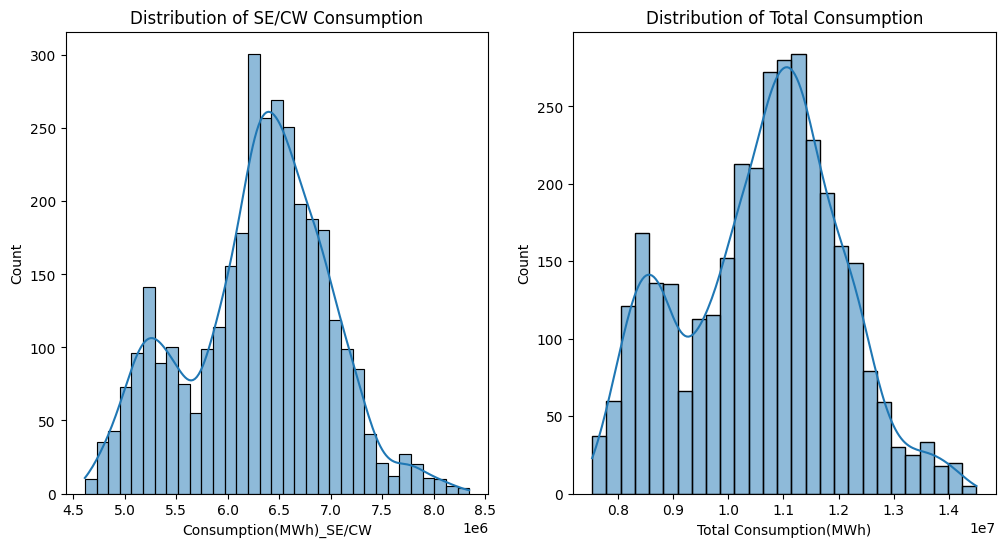

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for SE/CW and Total Consumption
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_consumption['Consumption(MWh)_SE/CW'], kde=True)
plt.title('Distribution of SE/CW Consumption')

plt.subplot(1, 2, 2)
sns.histplot(df_consumption['Total Consumption(MWh)'], kde=True)
plt.title('Distribution of Total Consumption')

plt.show()


In [8]:
df_prices_plus_consumption = gpd.merge_prices_and_consumption()
df_prices_plus_consumption.head()

,DateTime,DeliveryStartDate,Forward Price,Year,Month,Day,Day Of Week,Region,Date,average_settlement_price,...,first_settlement_price,last_settlement_price,count_price,skewness_settlement_price,ForecastedDate,Consumption(MWh)_N,Consumption(MWh)_NE,Consumption(MWh)_S,Consumption(MWh)_SE/CW,Total Consumption(MWh)
0,2021-11-05,2021-10-01,249.36,2021,11,5,Friday,SE/CW,2021-11-05,115.624583,...,128.09,104.22,24,-0.040105,2021-11-06,1035367.2,2075304.0,2002879.2,6656428.8,11769979.2
1,2021-11-05,2021-10-01,249.36,2021,11,5,Friday,SE/CW,2021-11-05,115.624583,...,128.09,104.22,24,-0.040105,2021-11-13,1025976.0,2036916.0,2045215.2,6654093.6,11762200.8
2,2021-11-05,2021-10-01,249.36,2021,11,5,Friday,SE/CW,2021-11-05,115.624583,...,128.09,104.22,24,-0.040105,2021-11-20,1038508.8,2088744.0,2153726.4,6856348.8,12137328.0
3,2021-11-05,2021-10-01,249.36,2021,11,5,Friday,SE/CW,2021-11-05,115.624583,...,128.09,104.22,24,-0.040105,2021-11-27,1039584.0,2091432.0,2170224.0,6881464.8,12182704.8
4,2021-11-05,2021-11-01,111.56,2021,11,5,Friday,SE/CW,2021-11-05,115.624583,...,128.09,104.22,24,-0.040105,2021-11-06,1035367.2,2075304.0,2002879.2,6656428.8,11769979.2
